- US-based housing company named Surprise Housing has decided to enter the Australian market.

In [1]:
# for mathematical operations
import numpy as np 

# for dataframe operations
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# full display of columns and rows
pd.set_option('display.max_column',None,'display.max_colwidth',1000,"display.max_rows",10000)

# lets select  a background style
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (18, 8)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#### Read dataset

In [2]:
# importing the dataset
data = pd.read_csv('train.csv')
data.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
data.shape

(1460, 81)

#### Inspect the dataframe's columns, shapes, variable types etc

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

#### Data Visualization (EDA)

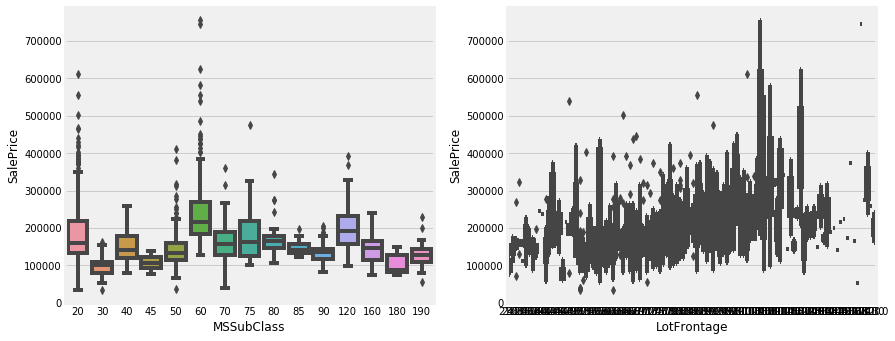

In [6]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'LotFrontage', y = 'SalePrice', data = data)

plt.show()

- we can see that in Identifies the type of dwelling involved in the sale is more in 2-STORY 1946 & NEWER
- and Linear feet of street connected to property is also more 4 million plus

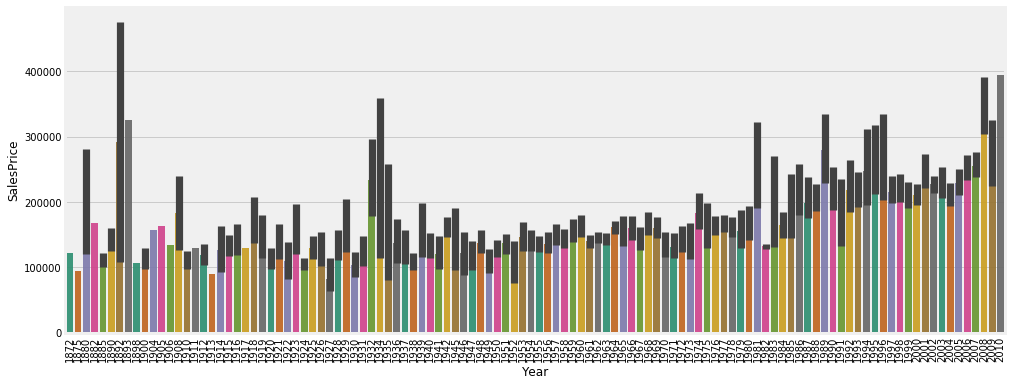

In [7]:
# lets plot the data
plt.rcParams['figure.figsize'] = (15, 6)
sns.barplot(y = data.SalePrice, x = data.YearBuilt, alpha=0.9, palette = 'Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Year', fontsize=12)
plt.ylabel('SalesPrice', fontsize=12)
plt.show()

- we can see that house build on year 20th century were more on sales than 90's 

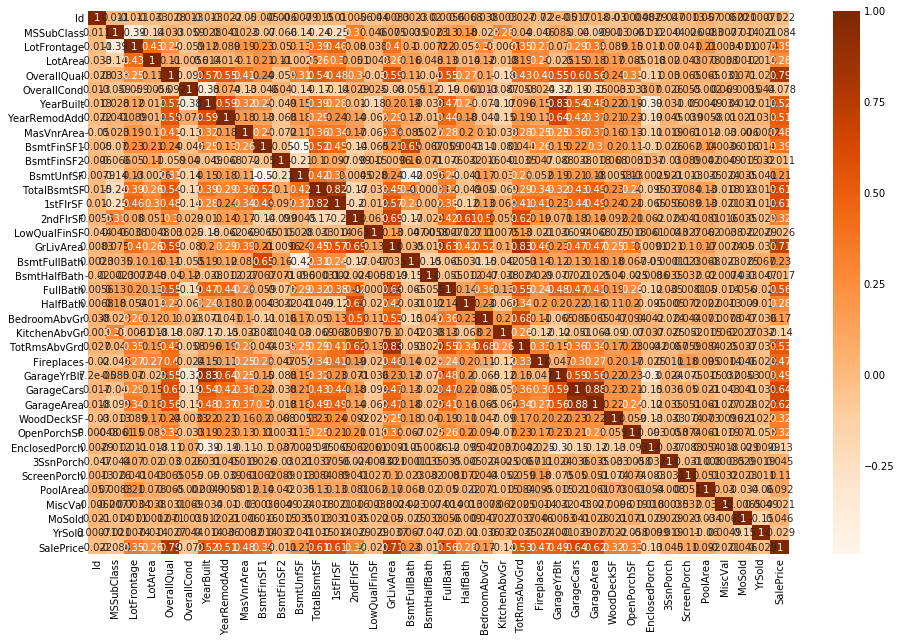

In [8]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (14, 10))
sns.heatmap(data.corr(), annot = True, cmap="Oranges")
plt.show()

- seemed to be some are corelated.

###### Data Preparation

In [9]:
# count column-wise null
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
# Get the row-wise Null count the same way. This time just specify the axis as 1

data.isnull().sum(axis=1)

0        5
1        4
2        4
3        4
4        4
5        3
6        4
7        4
8        4
9        4
10       5
11       4
12       6
13       4
14       4
15       4
16       4
17       9
18       5
19       4
20       4
21       2
22       4
23       4
24       4
25       4
26       5
27       4
28       4
29       5
30       3
31       5
32       5
33       4
34       4
35       4
36       5
37       4
38       5
39      15
40       3
41       4
42       5
43       5
44       5
45       4
46       4
47       5
48      10
49       4
50       6
51       2
52       5
53       4
54       3
55       4
56       4
57       5
58       4
59       4
60       5
61       5
62       4
63       4
64       5
65       4
66       5
67       5
68       5
69       4
70       4
71       5
72       4
73       4
74       5
75       4
76       6
77       4
78      10
79       3
80       4
81       5
82       4
83       5
84       4
85       4
86       4
87       4
88       9
89      10
90      10

In [11]:
# showing only column-wise Null value in detail from highest to lowest in percentage

all_data_na = (data.isnull().sum() / len(data)) * 100

# finding null value containing column by droping all non-null containing column
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False) 

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

Missing Ratio
PoolQC            99.520548
MiscFeature       96.301370
Alley             93.767123
Fence             80.753425
FireplaceQu       47.260274
LotFrontage       17.739726
GarageYrBlt        5.547945
GarageType         5.547945
GarageFinish       5.547945
GarageQual         5.547945
GarageCond         5.547945
BsmtFinType2       2.602740
BsmtExposure       2.602740
BsmtFinType1       2.534247
BsmtCond           2.534247
BsmtQual           2.534247
MasVnrArea         0.547945
MasVnrType         0.547945
Electrical         0.068493

- we have missing values but first we have to convert all NaN value into original label name as per given data set discription

In [12]:
data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [13]:
# replacing NA values with proper discription in column: 
data["Alley"].fillna("No alley access", inplace = True)
data["BsmtQual"].fillna("No Basement", inplace = True) 
data["BsmtCond"].fillna("No Basement", inplace = True)
data["BsmtExposure"].fillna("No Basement", inplace = True)
data["BsmtFinType1"].fillna("No Basement", inplace = True)
data["BsmtFinType2"].fillna("No Basement", inplace = True)
data["FireplaceQu"].fillna("No Fireplace", inplace = True)
data["GarageType"].fillna("No Garage", inplace = True)
data["GarageFinish"].fillna("No Garage", inplace = True)
data["GarageQual"].fillna("No Garage", inplace = True)
data["GarageCond"].fillna("No Garage", inplace = True)
data["PoolQC"].fillna("No Pool", inplace = True)
data["Fence"].fillna("No Fence", inplace = True)
data["MiscFeature"].fillna("None", inplace = True)

In [14]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0        1          60       RL         65.0     8450   Pave  No alley access   
1        2          20       RL         80.0     9600   Pave  No alley access   
2        3          60       RL         68.0    11250   Pave  No alley access   
3        4          70       RL         60.0     9550   Pave  No alley access   
4        5          60       RL         84.0    14260   Pave  No alley access   
5        6          50       RL         85.0    14115   Pave  No alley access   
6        7          20       RL         75.0    10084   Pave  No alley access   
7        8          60       RL          NaN    10382   Pave  No alley access   
8        9          50       RM         51.0     6120   Pave  No alley access   
9       10         190       RL         50.0     7420   Pave  No alley access   
10      11          20       RL         70.0    11200   Pave  No alley access   
11      12          60       RL         85.0    11924   Pave  No alley access   
12      13          20       RL          NaN    12968   Pave  No alley access   
13      14          20       RL         91.0    10652   Pave  No alley access   
14      15          20       RL          NaN    10920   Pave  No alley access   
15      16          45       RM         51.0     6120   Pave  No alley access   
16      17          20       RL          NaN    11241   Pave  No alley access   
17      18          90       RL         72.0    10791   Pave  No alley access   
18      19          20       RL         66.0    13695   Pave  No alley access   
19      20          20       RL         70.0     7560   Pave  No alley access   
20      21          60       RL        101.0    14215   Pave  No alley access   
21      22          45       RM         57.0     7449   Pave             Grvl   
22      23          20       RL         75.0     9742   Pave  No alley access   
23      24         120       RM         44.0     4224   Pave  No alley access   
24      25          20       RL          NaN     8246   Pave  No alley access   
25      26          20       RL        110.0    14230   Pave  No alley access   
26      27          20       RL         60.0     7200   Pave  No alley access   
27      28          20       RL         98.0    11478   Pave  No alley access   
28      29          20       RL         47.0    16321   Pave  No alley access   
29      30          30       RM         60.0     6324   Pave  No alley access   
30      31          70  C (all)         50.0     8500   Pave             Pave   
31      32          20       RL          NaN     8544   Pave  No alley access   
32      33          20       RL         85.0    11049   Pave  No alley access   
33      34          20       RL         70.0    10552   Pave  No alley access   
34      35         120       RL         60.0     7313   Pave  No alley access   
35      36          60       RL        108.0    13418   Pave  No alley access   
36      37          20       RL        112.0    10859   Pave  No alley access   
37      38          20       RL         74.0     8532   Pave  No alley access   
38      39          20       RL         68.0     7922   Pave  No alley access   
39      40          90       RL         65.0     6040   Pave  No alley access   
40      41          20       RL         84.0     8658   Pave  No alley access   
41      42          20       RL        115.0    16905   Pave  No alley access   
42      43          85       RL          NaN     9180   Pave  No alley access   
43      44          20       RL          NaN     9200   Pave  No alley access   
44      45          20       RL         70.0     7945   Pave  No alley access   
45      46         120       RL         61.0     7658   Pave  No alley access   
46      47          50       RL         48.0    12822   Pave  No alley access   
47      48          20       FV         84.0    11096   Pave  No alley access   
48      49         190       RM        

In [15]:
# showing only column-wise Null value in detail from highest to lowest in percentage

all_data_na = (data.isnull().sum() / len(data)) * 100

# finding null value containing column by droping all non-null containing column
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False) 

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

Missing Ratio
LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493

- we have this much missing value. Lets treat it

In [16]:
data = data[~np.isnan(data['LotFrontage'])] # we drop the row

In [17]:
# showing only column-wise Null value in detail from highest to lowest in percentage

all_data_na = (data.isnull().sum() / len(data)) * 100

# finding null value containing column by droping all non-null containing column
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False) 

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

Missing Ratio
GarageYrBlt       6.161532
MasVnrArea        0.499584
MasVnrType        0.499584
Electrical        0.083264

In [18]:
data = data[~np.isnan(data['GarageYrBlt'])] # drop the row

In [19]:
# showing only column-wise Null value in detail from highest to lowest in percentage

all_data_na = (data.isnull().sum() / len(data)) * 100

# finding null value containing column by droping all non-null containing column
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False) 

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

Missing Ratio
MasVnrArea       0.532387
MasVnrType       0.532387
Electrical       0.088731

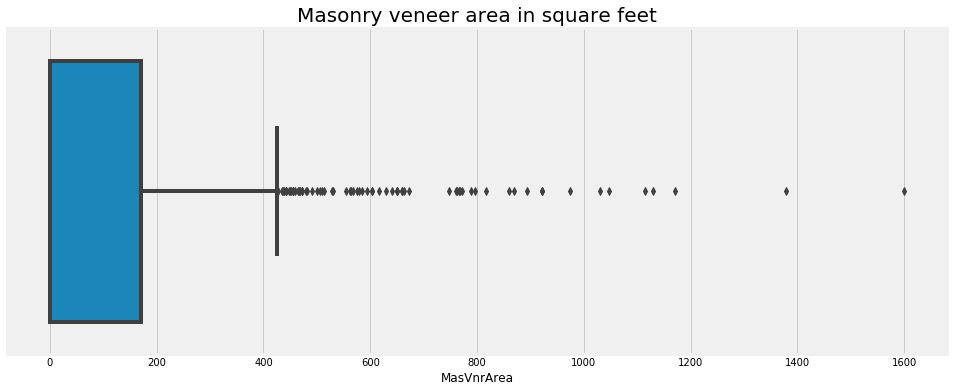

In [20]:
# lets check the Outliers of the MasVnrArea Columns
sns.boxplot(data['MasVnrArea'])
plt.title('Masonry veneer area in square feet', fontsize = 20)
plt.show()

In [21]:
data.MasVnrArea.quantile([0.1,0.2,0.25,0.5,0.7,0.8,0.9,0.95,0.99,1])

0.10       0.0
0.20       0.0
0.25       0.0
0.50       0.0
0.70     120.0
0.80     215.0
0.90     340.0
0.95     459.0
0.99     868.0
1.00    1600.0
Name: MasVnrArea, dtype: float64

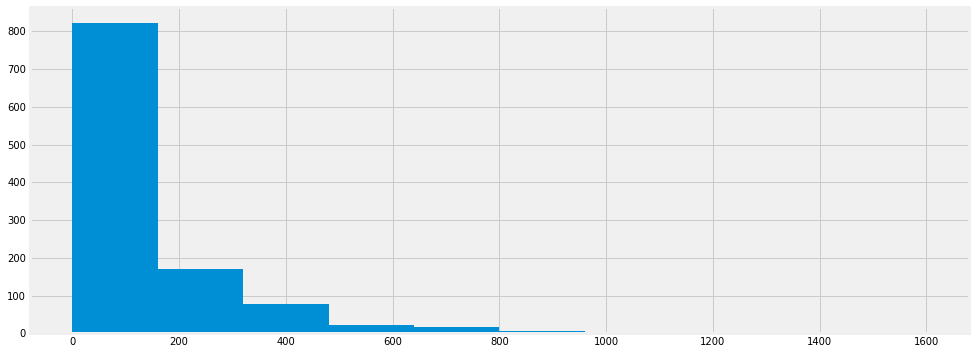

In [22]:
data.MasVnrArea.hist()
plt.show()

##### we can see from histogram that it is positive scewed. So, it is better to fill NaN values with Median

In [23]:
# lets perform numerical imputation for the column AMT_ANNUITY
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median())

In [24]:
# convert to type 'category'
data['Electrical'] = data['Electrical'].astype('category')
data['MasVnrType'] = data['MasVnrType'].astype('category')

In [25]:
# inputing NaN values by 'SBrkr'
data.loc[pd.isnull(data['Electrical']),['Electrical']] = 'SBrkr'
data.loc[pd.isnull(data['MasVnrType']),['MasVnrType']] = 'None'

In [26]:
# showing only column-wise Null value in detail from highest to lowest in percentage

all_data_na = (data.isnull().sum() / len(data)) * 100

# finding null value containing column by droping all non-null containing column
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False) 

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

Empty DataFrame
Columns: [Missing Ratio]
Index: []

###### Checking skewness

In [27]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'float64'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

skew
MasVnrArea   2.711619
LotFrontage  2.236493
GarageYrBlt -0.647526

In [28]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'int64'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

skew
LotArea        15.612255
PoolArea       13.802742
3SsnPorch      10.870005
LowQualFinSF   10.034941
MiscVal         9.713593
KitchenAbvGr    4.830573
BsmtFinSF2      4.406807
BsmtHalfBath    4.115218
ScreenPorch     4.026309
EnclosedPorch   3.179714
OpenPorchSF     2.370233
SalePrice       1.928305
BsmtFinSF1      1.913943
TotalBsmtSF     1.744743
WoodDeckSF      1.550172
GrLivArea       1.545319
MSSubClass      1.409920
1stFlrSF        1.358341
BsmtUnfSF       0.874084
OverallCond     0.851154
2ndFlrSF        0.806059
GarageArea      0.728644
TotRmsAbvGrd    0.721425
Fireplaces      0.644931
HalfBath        0.629663
BsmtFullBath    0.561113
OverallQual     0.288196
GarageCars      0.202912
MoSold          0.173103
YrSold          0.106288
BedroomAbvGr    0.069725
Id              0.011944
FullBath        0.009338
YearRemodAdd   -0.572894
YearBuilt      -0.624126

- it seems that we have highly possitive skewed. So we will use transformation like log transformation

In [29]:
#Log Transform
data['MasVnrArea'] = np.log1p(data['MasVnrArea'])
data['LotFrontage'] = np.log1p(data['LotFrontage'])
data['LotArea'] = np.log1p(data['LotArea'])
data['PoolArea'] = np.log1p(data['PoolArea'])

data['3SsnPorch'] = np.log1p(data['3SsnPorch'])
data['LowQualFinSF'] = np.log1p(data['LowQualFinSF'])

data['MiscVal'] = np.log1p(data['MiscVal'])
data['KitchenAbvGr'] = np.log1p(data['KitchenAbvGr'])

data['BsmtFinSF2'] = np.log1p(data['BsmtFinSF2'])
data['BsmtHalfBath'] = np.log1p(data['BsmtHalfBath'])

data['ScreenPorch'] = np.log1p(data['ScreenPorch'])
data['EnclosedPorch'] = np.log1p(data['EnclosedPorch'])

data['OpenPorchSF'] = np.log1p(data['OpenPorchSF'])
data['SalePrice'] = np.log1p(data['SalePrice'])
data['BsmtFinSF1'] = np.log1p(data['BsmtFinSF1'])

data['WoodDeckSF'] = np.log1p(data['WoodDeckSF'])
data['GrLivArea'] = np.log1p(data['GrLivArea'])
data['MSSubClass'] = np.log1p(data['MSSubClass'])
data['1stFlrSF'] = np.log1p(data['1stFlrSF'])

In [30]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'int64'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

skew
TotalBsmtSF   1.744743
BsmtUnfSF     0.874084
OverallCond   0.851154
2ndFlrSF      0.806059
GarageArea    0.728644
TotRmsAbvGrd  0.721425
Fireplaces    0.644931
HalfBath      0.629663
BsmtFullBath  0.561113
OverallQual   0.288196
GarageCars    0.202912
MoSold        0.173103
YrSold        0.106288
BedroomAbvGr  0.069725
Id            0.011944
FullBath      0.009338
YearRemodAdd -0.572894
YearBuilt    -0.624126

In [31]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'float64'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

skew
PoolArea       13.600391
LowQualFinSF    8.129215
3SsnPorch       7.876869
MiscVal         5.592504
KitchenAbvGr    4.698196
BsmtHalfBath    3.992769
ScreenPorch     3.028914
BsmtFinSF2      2.600249
EnclosedPorch   2.133062
MasVnrArea      0.480182
SalePrice       0.317487
MSSubClass      0.263893
WoodDeckSF      0.147256
GrLivArea       0.075390
1stFlrSF        0.058395
OpenPorchSF    -0.072692
LotArea        -0.483555
BsmtFinSF1     -0.562978
GarageYrBlt    -0.647526
LotFrontage    -0.711467

- we have overcome skewness for some variable but intresting pattern we get to see from dataset that most of the value of the label contain 'Zero'. So after transformation still we can't obtain normal distribution.

In [32]:
#Log Transform
data['LotArea'] = np.log1p(data['LotArea'])
data['PoolArea'] = np.log1p(data['PoolArea'])

data['3SsnPorch'] = np.log1p(data['3SsnPorch'])
data['LowQualFinSF'] = np.log1p(data['LowQualFinSF'])

data['MiscVal'] = np.log1p(data['MiscVal'])
data['KitchenAbvGr'] = np.log1p(data['KitchenAbvGr'])

data['BsmtFinSF2'] = np.log1p(data['BsmtFinSF2'])
data['BsmtHalfBath'] = np.log1p(data['BsmtHalfBath'])

data['ScreenPorch'] = np.log1p(data['ScreenPorch'])
data['EnclosedPorch'] = np.log1p(data['EnclosedPorch'])

In [33]:
# we drop highly possitive skewed column
data = data.drop('PoolArea', axis=1)

- Again we apply log transformation

In [34]:
data['3SsnPorch'] = np.log1p(data['3SsnPorch'])
data['LowQualFinSF'] = np.log1p(data['LowQualFinSF'])

data['MiscVal'] = np.log1p(data['MiscVal'])
data['KitchenAbvGr'] = np.log1p(data['KitchenAbvGr'])

data['BsmtFinSF2'] = np.log1p(data['BsmtFinSF2'])
data['BsmtHalfBath'] = np.log1p(data['BsmtHalfBath'])

data['ScreenPorch'] = np.log1p(data['ScreenPorch'])
data['EnclosedPorch'] = np.log1p(data['EnclosedPorch'])

In [35]:
data['3SsnPorch'] = np.log1p(data['3SsnPorch'])
data['LowQualFinSF'] = np.log1p(data['LowQualFinSF'])

data['MiscVal'] = np.log1p(data['MiscVal'])
data['KitchenAbvGr'] = np.log1p(data['KitchenAbvGr'])

data['BsmtFinSF2'] = np.log1p(data['BsmtFinSF2'])
data['BsmtHalfBath'] = np.log1p(data['BsmtHalfBath'])

data['ScreenPorch'] = np.log1p(data['ScreenPorch'])
data['EnclosedPorch'] = np.log1p(data['EnclosedPorch'])

In [36]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'float64'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

skew
LowQualFinSF   7.964986
3SsnPorch      7.732025
MiscVal        5.497659
KitchenAbvGr   4.638487
BsmtHalfBath   3.949309
ScreenPorch    2.994164
BsmtFinSF2     2.511500
EnclosedPorch  2.076031
MasVnrArea     0.480182
SalePrice      0.317487
MSSubClass     0.263893
WoodDeckSF     0.147256
GrLivArea      0.075390
1stFlrSF       0.058395
OpenPorchSF   -0.072692
BsmtFinSF1    -0.562978
GarageYrBlt   -0.647526
LotFrontage   -0.711467
LotArea       -0.901457

In [37]:
# lets check the skewness of the data

from scipy.stats import skew

# lets select only the numerical features present inside the data
numerical_feats = data.dtypes[data.dtypes == 'int64'].index

# checking the skewness in all the numerical features
skewed_feats = data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(100)

skew
TotalBsmtSF   1.744743
BsmtUnfSF     0.874084
OverallCond   0.851154
2ndFlrSF      0.806059
GarageArea    0.728644
TotRmsAbvGrd  0.721425
Fireplaces    0.644931
HalfBath      0.629663
BsmtFullBath  0.561113
OverallQual   0.288196
GarageCars    0.202912
MoSold        0.173103
YrSold        0.106288
BedroomAbvGr  0.069725
Id            0.011944
FullBath      0.009338
YearRemodAdd -0.572894
YearBuilt    -0.624126

In [38]:
data.dtypes

Id                  int64
MSSubClass        float64
MSZoning           object
LotFrontage       float64
LotArea           float64
Street             object
Alley              object
LotShape           object
LandContour        object
Utilities          object
LotConfig          object
LandSlope          object
Neighborhood       object
Condition1         object
Condition2         object
BldgType           object
HouseStyle         object
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle          object
RoofMatl           object
Exterior1st        object
Exterior2nd        object
MasVnrType       category
MasVnrArea        float64
ExterQual          object
ExterCond          object
Foundation         object
BsmtQual           object
BsmtCond           object
BsmtExposure       object
BsmtFinType1       object
BsmtFinSF1        float64
BsmtFinType2       object
BsmtFinSF2        float64
BsmtUnfSF           int64
TotalBsmtSF 

- Somehow we are able to acheive normal distribution

###### Creating Dummy variable

In [39]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['Condition2'], prefix  = 'Condition2', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['Condition2'], axis = 1, inplace = True)

In [40]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['Condition1'], prefix  = 'Condition1', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['Condition1'], axis = 1, inplace = True)

In [41]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['BldgType'], prefix  = 'BldgType', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['BldgType'], axis = 1, inplace = True)

In [42]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['MSZoning'], prefix  = 'MSZoning', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['MSZoning'], axis = 1, inplace = True)

In [43]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['Street'], prefix  = 'Street', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['Street'], axis = 1, inplace = True)

In [44]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['Alley'], prefix  = 'Alley', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['Alley'], axis = 1, inplace = True)

In [45]:
# Label Enconding 

data['LotShape'] = data['LotShape'].replace({'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1})

In [46]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['LandContour'], prefix  = 'LandContour', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['LandContour'], axis = 1, inplace = True)

In [47]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['Utilities'], prefix  = 'Utilities', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['Utilities'], axis = 1, inplace = True)

In [48]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['LotConfig'], prefix  = 'LotConfig', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['LotConfig'], axis = 1, inplace = True)

In [49]:

data['LandSlope'] = data['LandSlope'].replace({'Gtl':2, 'Mod':1, 'Sev':0})


In [50]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['Neighborhood'], prefix  = 'Neighborhood', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['Neighborhood'], axis = 1, inplace = True)

In [51]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['HouseStyle'], prefix  = 'HouseStyle', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['HouseStyle'], axis = 1, inplace = True)

In [52]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['RoofStyle'], prefix  = 'RoofStyle', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['RoofStyle'], axis = 1, inplace = True)

In [53]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['RoofMatl'], prefix  = 'RoofMatl', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['RoofMatl'], axis = 1, inplace = True)

In [54]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['Exterior1st'], prefix  = 'Exterior1st', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['Exterior1st'], axis = 1, inplace = True)

In [55]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['Exterior2nd'], prefix  = 'Exterior2nd', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['Exterior2nd'], axis = 1, inplace = True)

In [56]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['MasVnrType'], prefix  = 'MasVnrType', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['MasVnrType'], axis = 1, inplace = True)

In [57]:
data['ExterQual'] = data['ExterQual'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})

In [58]:
data['ExterCond'] = data['ExterCond'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})

In [59]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['Foundation'], prefix  = 'Foundation', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['Foundation'], axis = 1, inplace = True)

In [60]:

data['BsmtQual'] = data['BsmtQual'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No Basement':0})

In [61]:
data['BsmtCond'] = data['BsmtCond'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No Basement':0})


In [62]:

data['BsmtExposure'] = data['BsmtExposure'].replace({'Gd':4, 'Av':3, 'Mn':2, 'No':0, 'No Basement':0})

In [63]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['BsmtFinType1'], prefix  = 'BsmtFinType1', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['BsmtFinType1'], axis = 1, inplace = True)

In [64]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['BsmtFinType2'], prefix  = 'BsmtFinType2', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['BsmtFinType2'], axis = 1, inplace = True)

In [65]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['Heating'], prefix  = 'Heating', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['Heating'], axis = 1, inplace = True)

In [66]:

data['HeatingQC'] = data['HeatingQC'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})

In [67]:

data['CentralAir'] = data['CentralAir'].replace({'Y':1, 'N':0})


In [68]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['Electrical'], prefix  = 'Electrical', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['Electrical'], axis = 1, inplace = True)

In [69]:

data['KitchenQual'] = data['KitchenQual'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}) 

In [70]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['Functional'], prefix  = 'Functional', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['Functional'], axis = 1, inplace = True)

In [71]:

data['FireplaceQu'] = data['FireplaceQu'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No Fireplace':0})

In [72]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['GarageType'], prefix  = 'GarageType', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['GarageType'], axis = 1, inplace = True)

In [73]:

data['GarageFinish'] = data['GarageFinish'].replace({'Fin':3,'RFn':2, 'Unf':1, 'No Garage':0})


In [74]:

data['GarageQual'] = data['GarageQual'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No Garage':0})


In [75]:

data['GarageCond'] = data['GarageCond'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No Garage':0})


In [76]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['PavedDrive'], prefix  = 'PavedDrive', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['PavedDrive'], axis = 1, inplace = True)

In [77]:

data['PoolQC'] = data['PoolQC'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'No Pool':0})


In [78]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['Fence'], prefix  = 'Fence', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['Fence'], axis = 1, inplace = True)

In [79]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['MiscFeature'], prefix  = 'MiscFeature', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['MiscFeature'], axis = 1, inplace = True)

In [80]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['SaleType'], prefix  = 'SaleType', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['SaleType'], axis = 1, inplace = True)

In [81]:
# Get the dummy variables for the feature 'Lead Origin' and store it in a new variable - 'status'
status = pd.get_dummies(data['SaleCondition'], prefix  = 'SaleCondition', drop_first = True)   #we used prefix because to identify rows which have similar name with other column

# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

# Drop 'Season' as we have created the dummies for it
data.drop(['SaleCondition'], axis = 1, inplace = True)

In [82]:
data.head()

Id  MSSubClass  LotFrontage   LotArea  LotShape  LandSlope  OverallQual  \
0   1    4.110874     4.189655  2.306780         4          2            7   
1   2    3.044522     4.394449  2.319405         4          2            6   
2   3    4.110874     4.234107  2.334879         3          2            7   
3   4    4.262680     4.110874  2.318892         3          2            7   
4   5    4.110874     4.442651  2.357574         3          2            8   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  \
0            5       2003          2003    5.283204          4          3   
1            8       1976          1976    0.000000          3          3   
2            5       2001          2002    5.093750          4          3   
3            5       1915          1970    0.000000          3          3   
4            5       2000          2000    5.860786          4          3   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         4         3             0    6.561031         0.0        150   
1         4         3             4    6.886532         0.0        284   
2         4         3             2    6.188264         0.0        434   
3         3         4             0    5.379897         0.0        540   
4         4         3             3    6.486161         0.0        490   

   TotalBsmtSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          856          5           1  6.753438       854           0.0   
1         1262          5           1  7.141245         0           0.0   
2          920          5           1  6.825460       866           0.0   
3          756          4           1  6.869014       756           0.0   
4         1145          5           1  7.044033      1053           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444833             1      0.000000         2         1             3   
1   7.141245             0      0.352793         2         0             3   
2   7.488294             1      0.000000         2         1             3   
3   7.448916             1      0.000000         1         0             3   
4   7.695758             1      0.000000         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Fireplaces  FireplaceQu  \
0      0.352793            4             8           0            0   
1      0.352793            3             6           1            3   
2      0.352793            4             6           1            3   
3      0.352793            4             7           1            4   
4      0.352793            4             9           1            3   

   GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  \
0       2003.0             2           2         548           3           3   
1       1976.0             2           2         460           3           3   
2       2001.0             2           2         608           3           3   
3       1998.0             1           3         642           3           3   
4       2000.0             2           3         836           3           3   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolQC  \
0    0.000000     4.127134       0.000000        0.0          0.0       0   
1    5.700444     0.000000       0.000000        0.0          0.0       0   
2    0.000000     3.761200       0.000000        0.0          0.0       0   
3    0.000000     3.583519       0.723064        0.0          0.0       0   
4    5.262690     4.442651       0.000000        0.0          0.0       0   

   MiscVal  MoSold  YrSold  SalePrice  Condition2_Feedr  Condition2_Norm  \
0      0.0       2    2008  12.247699                 0                1   
1      0.0       5    2007  12.109016                 0                1   
2      0.0       9    2008  12.317171                 0                1   
3      0.0       2    2006  11.

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1459
Columns: 212 entries, Id to SaleCondition_Partial
dtypes: float64(19), int64(33), uint8(160)
memory usage: 642.7 KB


- after label encoding and dummy variable we have prepaired our data set

In [84]:
data.shape

(1127, 212)

###### Treating Year Column

In [85]:
data['Age of YearBuilt'] = data['YearBuilt'].apply(lambda x: 2020-x)
data['Age of YearRemodAdd'] = data['YearRemodAdd'].apply(lambda x: 2020-x)
data['Age of GarageYrBlt'] = data['GarageYrBlt'].apply(lambda x: 2020.0-x)
data['Age of YrSold'] = data['YrSold'].apply(lambda x: 2020-x)

- Converting year column into a value by substracting year by present year. we done this to avoid biasness and it will be easy to scale down

In [86]:
data.drop("YearBuilt",inplace=True,axis=1)
data.drop("YearRemodAdd",inplace=True,axis=1)
data.drop("GarageYrBlt",inplace=True,axis=1)
data.drop("YrSold",inplace=True,axis=1)
data.drop('Id',inplace=True,axis=1)

- after creating new column, we drop remaing year column

In [87]:
data.dtypes

MSSubClass                  float64
LotFrontage                 float64
LotArea                     float64
LotShape                      int64
LandSlope                     int64
OverallQual                   int64
OverallCond                   int64
MasVnrArea                  float64
ExterQual                     int64
ExterCond                     int64
BsmtQual                      int64
BsmtCond                      int64
BsmtExposure                  int64
BsmtFinSF1                  float64
BsmtFinSF2                  float64
BsmtUnfSF                     int64
TotalBsmtSF                   int64
HeatingQC                     int64
CentralAir                    int64
1stFlrSF                    float64
2ndFlrSF                      int64
LowQualFinSF                float64
GrLivArea                   float64
BsmtFullBath                  int64
BsmtHalfBath                float64
FullBath                      int64
HalfBath                      int64
BedroomAbvGr                

##### Spliting dataset

In [88]:
# split into X and y
X = data.loc[:, ['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','KitchenQual','TotRmsAbvGrd','SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca','Fireplaces','FireplaceQu','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolQC','MiscVal','MoSold','BsmtFinType1_LwQ','BsmtFinType1_No Basement','BsmtFinType1_Rec','BsmtFinType1_Unf','BsmtFinType2_BLQ','BsmtFinType2_GLQ','BsmtFinType2_LwQ','BsmtFinType2_No Basement','BsmtFinType2_Rec','BsmtFinType2_Unf','Heating_GasW','Heating_Grav','Heating_OthW','Heating_Wall','Electrical_FuseF','Electrical_FuseP','Electrical_Mix','Electrical_SBrkr','Functional_Maj2','Functional_Min1','Functional_Min2','Functional_Mod','Functional_Typ','GarageType_Attchd','GarageType_Basment','GarageType_BuiltIn','GarageType_CarPort','GarageType_Detchd','PavedDrive_P','PavedDrive_Y','Fence_GdWo','Fence_MnPrv','Fence_MnWw','Fence_No Fence','MiscFeature_Othr','MiscFeature_Shed','MiscFeature_TenC','SaleType_CWD','SaleType_Con','SaleType_ConLD','SaleType_ConLI','SaleType_ConLw','SaleType_New','SaleType_Oth','Condition2_Feedr','Condition2_Norm','Condition2_PosA','Condition2_PosN','Condition2_RRNn','Condition1_Feedr','Condition1_Norm','Condition1_PosA','Condition1_PosN','Condition1_RRAe','Condition1_RRAn', 'Condition1_RRNe','Condition1_RRNn','BldgType_2fmCon','BldgType_Duplex','BldgType_Twnhs','BldgType_TwnhsE','MSZoning_FV','MSZoning_RH','MSZoning_RL','MSZoning_RM','Street_Pave','Alley_No alley access','Alley_Pave','LandContour_HLS','LandContour_Low', 'LandContour_Lvl','LotConfig_CulDSac','LotConfig_FR2','LotConfig_FR3','LotConfig_Inside','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards','Neighborhood_Gilbert','Neighborhood_IDOTRR','Neighborhood_MeadowV', 'Neighborhood_Mitchel','Neighborhood_NAmes','Neighborhood_NPkVill','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown','Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_StoneBr','Neighborhood_Timber','Neighborhood_Veenker','HouseStyle_1.5Unf','HouseStyle_1Story','HouseStyle_2.5Fin','HouseStyle_2.5Unf','HouseStyle_2Story','HouseStyle_SFoyer','HouseStyle_SLvl','RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard','RoofMatl_CompShg','RoofMatl_Membran','RoofMatl_Roll','RoofMatl_Tar&Grv','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_BrkComm','Exterior1st_BrkFace', 'Exterior1st_CBlock','Exterior1st_CemntBd','Exterior1st_HdBoard','Exterior1st_ImStucc', 'Exterior1st_MetalSd','Exterior1st_Plywood','Exterior1st_Stone','Exterior1st_Stucco','Exterior1st_VinylSd','Exterior1st_Wd Sdng','Exterior1st_WdShing','Exterior2nd_AsphShn','Exterior2nd_Brk Cmn','Exterior2nd_BrkFace','Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_ImStucc','Exterior2nd_MetalSd','Exterior2nd_Other','Exterior2nd_Plywood','Exterior2nd_Stone','Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','Exterior2nd_Wd Shng','MasVnrType_BrkFace','MasVnrType_None','MasVnrType_Stone','Foundation_CBlock','Foundation_PConc','Foundation_Slab','Foundation_Stone','Foundation_Wood','BsmtFinType1_BLQ','BsmtFinType1_GLQ',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'Age of YearBuilt', 'Age of YearRemodAdd', 'Age of GarageYrBlt',
       'Age of YrSold']]

y = data['SalePrice']  


In [89]:
data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'Age of YearBuilt', 'Age of YearRemodAdd', 'Age of GarageYrBlt',
       'Age of YrSold'],
      dtype='object', length=211)

In [90]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

In [91]:

# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

##### Scalling

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()

X[['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath','KitchenAbvGr','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','MoSold']] = scaler.fit_transform(X[['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath','KitchenAbvGr','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','MoSold']])

X.head()

MSSubClass  LotFrontage   LotArea  LotShape  LandSlope  OverallQual  \
0    0.444520    -0.081652 -0.091028         4          2            7   
1   -1.110062     0.519168  0.165716         4          2            6   
2    0.444520     0.048759  0.480404         3          2            7   
3    0.665831    -0.312778  0.155272         3          2            7   
4    0.444520     0.660582  0.941926         3          2            8   

   OverallCond  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0            5    1.179423          4          3         4         3   
1            8   -0.815973          3          3         4         3   
2            5    1.107869          4          3         4         3   
3            5   -0.815973          3          3         3         4   
4            5    1.397568          4          3         4         3   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0             0    0.797120   -0.349847  -0.987400    -0.499123          5   
1             4    0.905157   -0.349847  -0.689585     0.412223          5   
2             2    0.673396   -0.349847  -0.356211    -0.355462          5   
3             0    0.405092   -0.349847  -0.120626    -0.723592          4   
4             3    0.772270   -0.349847  -0.231751     0.149594          5   

   CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           1 -0.841959  1.143342     -0.123713   0.503996             1   
1           1  0.386788 -0.805305     -0.123713  -0.436466             0   
2           1 -0.613761  1.170723     -0.123713   0.638629             1   
3           1 -0.475761  0.919726     -0.123713   0.516644             1   
4           1  0.078776  1.597417     -0.123713   1.281317             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0     -0.239087         2         1             3     -0.208045            4   
1      4.160063         2         0             3     -0.208045            3   
2     -0.239087         2         1             3     -0.208045            4   
3     -0.239087         1         0             3     -0.208045            4   
4     -0.239087         2         1             4     -0.208045            4   

   TotRmsAbvGrd  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             8            1                      0                     0   
1             6            1                      0                     0   
2             6            1                      0                     0   
3             7            1                      0                     0   
4             9            1                      0                     0   

   Fireplaces  FireplaceQu  GarageFinish  GarageCars  GarageArea  GarageQual  \
0           0            0             2           2    0.233205           3   
1           1            3             2           2   -0.227610           3   
2           1            3             2           2    0.547397           3   
3           1            4             1           3    0.725439           3   
4           1            3             2           3    1.741326           3   

   GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0           3   -0.949203     0.831548      -0.403640  -0.127344    -0.303358   
1           3    1.255087    -1.100588      -0.403640  -0.127344    -0.303358   
2           3   -0.949203     0.660234      -0.403640  -0.127344    -0.303358   
3           3   -0.949203     0.577052       2.560131  -0.127344    -0.303358   
4           3    1.085813     0.979259      -0.403640  -0.127344    -0.303358   

   PoolQC   MiscVal    MoSold  BsmtFinType1_LwQ  BsmtFinType1_No Basement  \
0       0 -0.176329 -1.615348                 0                         0   
1       0 -0.176329 -0.500985                 0                         0   
2       0 -0.176329  0.984832                 0         

## 3. Model Building and Evaluation
## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.


## Ridge Regression

In [94]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [95]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.020187      0.022890         0.001999    6.324871e-04      0.0001   
1       0.007596      0.001198         0.001399    4.903303e-04       0.001   
2       0.008592      0.001354         0.001598    4.897461e-04        0.01   
3       0.008196      0.000748         0.001398    4.895125e-04        0.05   
4       0.007597      0.000491         0.001998    9.933790e-07         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.115491          -0.100278          -0.137208   
1   {'alpha': 0.001}          -0.114708          -0.099137          -0.122077   
2    {'alpha': 0.01}          -0.111688          -0.098089          -0.105491   
3    {'alpha': 0.05}          -0.106292          -0.098115          -0.101854   
4     {'alpha': 0.1}          -0.104272          -0.097703          -0.101436   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.085951          -0.077062        -0.103253        0.021431   
1          -0.086127          -0.077794        -0.100014        0.016669   
2          -0.084586          -0.078645        -0.095735        0.012417   
3          -0.084979          -0.079900        -0.094258        0.010091   
4          -0.085610          -0.080896        -0.094011        0.009123   

   rank_test_score  split0_train_score  split1_train_score  \
0               26           -0.053755           -0.055421   
1               25           -0.054009           -0.055734   
2               23           -0.054892           -0.056388   
3               21           -0.057045           -0.057000   
4               20           -0.058773           -0.057501   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.054837           -0.054633           -0.056554   
1           -0.055074           -0.054669           -0.056788   
2           -0.055994           -0.055696           -0.057844   
3           -0.058881           -0.058561           -0.060941   
4           -0.060864           -0.060514           -0.062743   

   mean_train_score  std_train_score  
0         -0.055040         0.000927  
1         -0.055255         0.000949  
2         -0.056163         0.000973  
3         -0.058486         0.001447  
4         -0.060079         0.001803

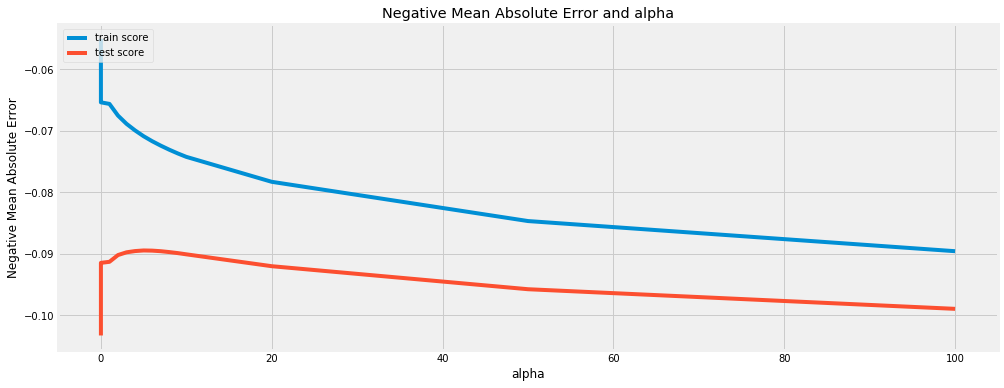

In [96]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

- we are able to see taht alpha value is 8

In [97]:
alpha = 0.001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-3.51778768e-02,  6.40184465e-03,  1.08912119e+00,  2.51817893e-03,
       -4.86624833e-03,  3.37289717e-02,  4.44437197e-02,  3.68846854e-03,
        1.21116503e-02, -3.78838677e-02,  3.07067254e-02,  2.31975911e-02,
        6.04508571e-03,  1.54979924e-05, -4.31847758e-01, -5.96001742e-05,
        1.43744337e-04,  8.39480056e-03,  7.47171325e-02,  2.16285705e-01,
        1.61550429e-04, -6.08437100e-03,  1.48061404e-01,  1.81700208e-02,
        3.04734069e-02,  3.11118281e-02,  3.57424061e-02, -1.68160218e-02,
       -8.04116395e-01,  2.40691380e-02,  5.65619250e-03, -4.38479376e-02,
        3.10664757e-01,  1.94920828e-02,  4.95733576e-03,  5.60910251e-04,
       -1.29533654e-03,  3.07865272e-02,  7.09312699e-05,  5.12377440e-02,
       -1.99844915e-02,  2.12717039e-03,  3.94941104e-03,  2.16567691e-02,
        6.30188600e-02,  4.90229711e-02,  3.75061368e-02,  2.29037433e+00,
        4.22898486e-04,  3.10634620e-03, -1.44252126e-01, -1.56579794e-02,
       -2.09671089e-02, -

## Lasso

In [98]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [99]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.162507      0.033272         0.001999    4.623108e-07      0.0001   
1       0.035379      0.009537         0.001799    3.996853e-04       0.001   
2       0.010993      0.001414         0.001599    4.890840e-04        0.01   
3       0.011193      0.001468         0.001399    4.893956e-04        0.05   
4       0.010193      0.001166         0.001400    4.892593e-04         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.100740          -0.092379          -0.096955   
1   {'alpha': 0.001}          -0.087820          -0.095928          -0.095162   
2    {'alpha': 0.01}          -0.105830          -0.118699          -0.112954   
3    {'alpha': 0.05}          -0.122205          -0.133992          -0.116073   
4     {'alpha': 0.1}          -0.136587          -0.147431          -0.131442   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.081686          -0.077410        -0.089860        0.008905   
1          -0.086303          -0.073707        -0.087804        0.008008   
2          -0.109991          -0.102755        -0.110055        0.005556   
3          -0.118003          -0.113242        -0.120716        0.007260   
4          -0.128431          -0.126223        -0.134040        0.007553   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.059926           -0.060220   
1                1           -0.077390           -0.073574   
2                3           -0.104321           -0.094900   
3                4           -0.117168           -0.109603   
4                5           -0.130766           -0.117562   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.062183           -0.062625           -0.064939   
1           -0.077140           -0.077522           -0.080874   
2           -0.105712           -0.106184           -0.107938   
3           -0.117107           -0.117333           -0.119013   
4           -0.132706           -0.131150           -0.132923   

   mean_train_score  std_train_score  
0         -0.061979         0.001818  
1         -0.077300         0.002313  
2         -0.103811         0.004603  
3         -0.116045         0.003297  
4         -0.129021         0.005791

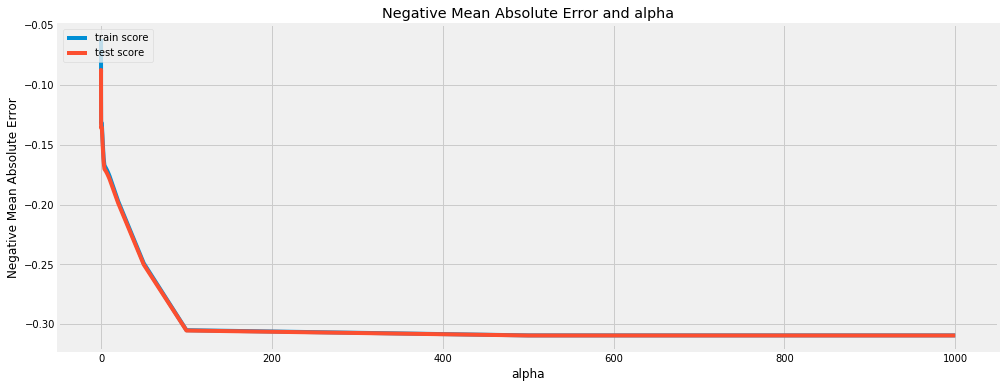

In [100]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

- we are able to see alpha value is 100

In [101]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
lasso.coef_

array([-3.55079947e-02,  4.91261662e-03,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  5.81165164e-02,  4.52235648e-02,  1.03956366e-03,
        2.79363265e-02, -1.37287184e-02,  3.14156455e-02,  0.00000000e+00,
        1.28090372e-02,  1.31974713e-02,  0.00000000e+00,  2.08125586e-05,
       -3.20542060e-05,  6.71694483e-03,  4.04931219e-02,  3.33297727e-01,
        2.19478876e-04,  0.00000000e+00,  4.85979049e-02,  2.90701701e-02,
       -0.00000000e+00,  2.03209596e-02,  2.97729858e-02, -3.78866619e-03,
       -0.00000000e+00,  2.41396065e-02, -0.00000000e+00, -3.53358822e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  8.91267999e-03,
        1.08017723e-02,  4.37821619e-02,  4.59953551e-05,  1.33797550e-02,
        0.00000000e+00,  1.95353078e-03,  5.19099986e-03,  0.00000000e+00,
        0.00000000e+00,  1.71464201e-02, -3.14458742e-02, -0.00000000e+00,
        5.44544222e-04,  0.00000000e+00,  0.00000000e+00, -1.12526625e-02,
        0.00000000e+00, -

#### Building a model

In [103]:
from sklearn.feature_selection import RFE

In [104]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_train,y_train)    # 1st we fit model then we pass lasso to RFE

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [105]:
rfe = RFE(lasso,25)     # we will run rfe with 25 variable
rfe = rfe.fit(X_train,y_train)

In [106]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 6),
 ('LotFrontage', False, 18),
 ('LotArea', False, 50),
 ('LotShape', False, 49),
 ('LandSlope', False, 48),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 27),
 ('ExterQual', True, 1),
 ('ExterCond', False, 14),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 64),
 ('BsmtExposure', False, 10),
 ('BsmtFinSF1', False, 13),
 ('BsmtFinSF2', False, 67),
 ('BsmtUnfSF', False, 46),
 ('TotalBsmtSF', False, 44),
 ('HeatingQC', False, 16),
 ('CentralAir', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 41),
 ('LowQualFinSF', False, 73),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 74),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 39),
 ('KitchenAbvGr', False, 88),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 83),
 ('SaleType_WD', False, 38),
 ('SaleCondition_AdjLand', False, 56),
 ('SaleCondition_Alloca', False, 51),
 ('Fireplaces', False, 71),
 ('FireplaceQu', False, 2

In [107]:
# to look at column which RFE select 
col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'KitchenQual', 'GarageCars', 'Functional_Typ', 'SaleType_New',
       'BldgType_Twnhs', 'MSZoning_FV', 'MSZoning_RL', 'LotConfig_CulDSac',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Exterior2nd_Stucco',
       'SaleCondition_Normal'],
      dtype='object')

In [108]:
# to look at column which RFE not select 
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'MasVnrArea', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
       ...
       'Foundation_Stone', 'Foundation_Wood', 'BsmtFinType1_BLQ',
       'BsmtFinType1_GLQ', 'SaleCondition_Family', 'SaleCondition_Partial',
       'Age of YearBuilt', 'Age of YearRemodAdd', 'Age of GarageYrBlt',
       'Age of YrSold'],
      dtype='object', length=185)

In [109]:
X_train_rfeLasso = X_train[col]

In [110]:
import statsmodels.api as sm
X_train_rfeLasso = sm.add_constant(X_train_rfeLasso)
lasso=sm.OLS(y_train,X_train_rfeLasso).fit()

In [111]:
print(lasso.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     268.3
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:36:48   Log-Likelihood:                 522.12
No. Observations:                 788   AIC:                            -992.2
Df Residuals:                     762   BIC:                            -870.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.1943 

In [112]:
dhdh

NameError: name 'dhdh' is not defined

- p-value should be less than 0.05, and we can clearly see that SaleCondition_Family is 0.955. So we will drop

In [ ]:
X_train_rfeLasso=X_train_rfeLasso.drop(['SaleCondition_Family'],axis=1)

In [ ]:
import statsmodels.api as sm
X_train_rfeLasso=sm.add_constant(X_train_rfeLasso)
lasso1=sm.OLS(y_train,X_train_rfeLasso).fit()

In [ ]:
print(lasso1.summary())

- adj r-square is stable but p-value is more. So, we will drop

In [ ]:
X_train_rfeLasso=X_train_rfeLasso.drop(['Foundation_Stone'],axis=1)

In [ ]:
import statsmodels.api as sm
X_train_rfeLasso=sm.add_constant(X_train_rfeLasso)
lasso2=sm.OLS(y_train,X_train_rfeLasso).fit()

In [ ]:
print(lasso2.summary())

- still p-value is more 

In [ ]:
X_train_rfeLasso=X_train_rfeLasso.drop(['BsmtFinType1_BLQ'],axis=1)

In [ ]:
import statsmodels.api as sm
X_train_rfeLasso=sm.add_constant(X_train_rfeLasso)
lasso3=sm.OLS(y_train,X_train_rfeLasso).fit()

In [ ]:
print(lasso3.summary())

- p-value is more

In [ ]:
X_train_rfeLasso=X_train_rfeLasso.drop(['Age of GarageYrBlt'],axis=1)

In [ ]:
import statsmodels.api as sm
X_train_rfeLasso=sm.add_constant(X_train_rfeLasso)
lasso4=sm.OLS(y_train,X_train_rfeLasso).fit()

In [ ]:
print(lasso4.summary())

In [ ]:
X_train_rfeLasso=X_train_rfeLasso.drop(['LowQualFinSF'],axis=1)

In [ ]:
import statsmodels.api as sm
X_train_rfeLasso=sm.add_constant(X_train_rfeLasso)
lasso5=sm.OLS(y_train,X_train_rfeLasso).fit()

In [ ]:
print(lasso5.summary())

In [ ]:
X_train_rfeLasso=X_train_rfeLasso.drop(['GrLivArea'],axis=1)

In [ ]:
import statsmodels.api as sm
X_train_rfeLasso=sm.add_constant(X_train_rfeLasso)
lasso6=sm.OLS(y_train,X_train_rfeLasso).fit()

In [ ]:
print(lasso6.summary())

In [ ]:
X_train_rfeLasso=X_train_rfeLasso.drop(['BsmtHalfBath'],axis=1)

In [ ]:
import statsmodels.api as sm
X_train_rfeLasso=sm.add_constant(X_train_rfeLasso)
lasso7=sm.OLS(y_train,X_train_rfeLasso).fit()

In [ ]:
print(lasso7.summary())

In [ ]:
X_train_rfeLasso=X_train_rfeLasso.drop(['Foundation_PConc'],axis=1)

In [ ]:
import statsmodels.api as sm
X_train_rfeLasso=sm.add_constant(X_train_rfeLasso)
lasso8=sm.OLS(y_train,X_train_rfeLasso).fit()

In [ ]:
print(lasso8.summary())

In [ ]:
X_train_rfeLasso=X_train_rfeLasso.drop(['Age of YrSold'],axis=1)

In [ ]:
import statsmodels.api as sm
X_train_rfeLasso=sm.add_constant(X_train_rfeLasso)
lasso9=sm.OLS(y_train,X_train_rfeLasso).fit()

In [ ]:
print(lasso9.summary())

In [ ]:
X_train_rfeLasso=X_train_rfeLasso.drop(['TotalBsmtSF'],axis=1)

In [ ]:
import statsmodels.api as sm
X_train_rfeLasso=sm.add_constant(X_train_rfeLasso)
lasso10=sm.OLS(y_train,X_train_rfeLasso).fit()

In [ ]:
print(lasso10.summary())

In [113]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfeLasso.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfeLasso.values, i) for i in range(X_train_rfeLasso.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                  const  1658.81
7              GrLivArea     4.37
1            OverallQual     4.05
3              ExterQual     3.38
6               1stFlrSF     2.82
9               FullBath     2.77
11           KitchenQual     2.57
14          SaleType_New     2.28
4               BsmtQual     2.21
10              HalfBath     2.17
12            GarageCars     2.06
25  SaleCondition_Normal     1.93
17           MSZoning_RL     1.71
16           MSZoning_FV     1.62
22  Neighborhood_NridgHt     1.41
2            OverallCond     1.34
21  Neighborhood_NoRidge     1.24
8           BsmtFullBath     1.23
5             CentralAir     1.18
15        BldgType_Twnhs     1.17
13        Functional_Typ     1.15
19  Neighborhood_Crawfor     1.12
20  Neighborhood_Edwards     1.12
23  Neighborhood_StoneBr     1.12
18     LotConfig_CulDSac     1.08
24    Exterior2nd_Stucco     1.06

- P-value and VIF value is under consideration. So we can proceed for prediction

In [ ]:
x = data.loc[:,['2ndFlrSF','FullBath','Age of YearBuilt','SaleCondition_Partial','Age of YearRemodAdd','HalfBath','SaleCondition_Normal','BsmtFinType1_GLQ','1stFlrSF','BedroomAbvGr','HeatingQC','BsmtFullBath','CentralAir','Foundation_Slab','Foundation_Wood']]
Y = data['SalePrice']  

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [ ]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [ ]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train_scaled, Y_train) 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_pred_test = lasso.predict(x_test_scaled)
y_pred_train = lasso.predict(x_train_scaled)
rmse_train=np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
print('r2 score on  trainset:', r2_score(y_train,y_pred_train))
print('r2 score on testingset:', r2_score(y_test,y_pred_test))
print('RMSE score on train set:', rmse_train)
print('RMSE score on testing set', rmse_test)

mse_train=np.mean((y_train-y_pred_train)**2)
mse_test=np.mean((y_test-y_pred_test)**2)
print('MSE score on trainset: ', mse_train)
print('MSE score on testing set:',mse_test)

### Model on ridge

In [115]:
Ridge(alpha=0.001)

Ridge=Ridge(alpha=0.001)
Ridge.fit(X_train,y_train)    # 1st we fit model then we pass Ridge to RFE

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [116]:
rfe = RFE(Ridge,25)     # we will run rfe with 25 variable
rfe = rfe.fit(X_train,y_train)

In [117]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 112),
 ('LotFrontage', False, 144),
 ('LotArea', True, 1),
 ('LotShape', False, 162),
 ('LandSlope', False, 146),
 ('OverallQual', False, 77),
 ('OverallCond', False, 86),
 ('MasVnrArea', False, 149),
 ('ExterQual', False, 127),
 ('ExterCond', False, 96),
 ('BsmtQual', False, 5),
 ('BsmtCond', False, 123),
 ('BsmtExposure', False, 140),
 ('BsmtFinSF1', False, 178),
 ('BsmtFinSF2', False, 38),
 ('BsmtUnfSF', False, 177),
 ('TotalBsmtSF', False, 172),
 ('HeatingQC', False, 133),
 ('CentralAir', False, 8),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 170),
 ('LowQualFinSF', False, 55),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 81),
 ('BsmtHalfBath', False, 43),
 ('FullBath', False, 92),
 ('HalfBath', False, 91),
 ('BedroomAbvGr', False, 119),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', False, 27),
 ('TotRmsAbvGrd', False, 147),
 ('SaleType_WD', False, 101),
 ('SaleCondition_AdjLand', False, 7),
 ('SaleCondition_Alloca', False, 131),
 ('Fireplaces', False, 1

In [118]:
# to look at column which RFE select 
col=X_train.columns[rfe.support_]
col

Index(['LotArea', '1stFlrSF', 'GrLivArea', 'KitchenAbvGr', 'MiscVal',
       'Heating_Grav', 'Electrical_FuseP', 'Functional_Maj2',
       'MiscFeature_Shed', 'MiscFeature_TenC', 'SaleType_Oth',
       'Condition2_Feedr', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_SWISU', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Exterior2nd_Other'],
      dtype='object')

In [119]:
# to look at column which RFE not select 
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotShape', 'LandSlope', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       ...
       'Foundation_Wood', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'Age of YearBuilt', 'Age of YearRemodAdd', 'Age of GarageYrBlt',
       'Age of YrSold'],
      dtype='object', length=185)

In [120]:
X_train_rfeRidge = X_train[col]

In [121]:
import statsmodels.api as sm
X_train_rfeRidge = sm.add_constant(X_train_rfeRidge)
Ridge=sm.OLS(y_train,X_train_rfeRidge).fit()

In [122]:
print(Ridge.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     94.05
Date:                Thu, 05 Nov 2020   Prob (F-statistic):          2.15e-213
Time:                        19:38:11   Log-Likelihood:                 177.28
No. Observations:                 788   AIC:                            -302.6
Df Residuals:                     762   BIC:                            -181.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.5521    

In [ ]:
thfgfg

In [ ]:
X_train_rfeRidge=X_train_rfeRidge.drop(['BldgType_Twnhs'],axis=1)

In [ ]:
import statsmodels.api as sm
X_train_rfeRidge = sm.add_constant(X_train_rfeRidge)
Ridge1=sm.OLS(y_train,X_train_rfeRidge).fit()

In [ ]:
print(Ridge1.summary())

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfeRidge.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfeRidge.values, i) for i in range(X_train_rfeRidge.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

- P-value and VIF value is under consideration. So we can proceed for prediction

In [ ]:
x1 = data.loc[:,['OverallQual','ExterQual','GrLivArea','SaleType_New','1stFlrSF','GarageCars','SaleCondition_Normal','LotArea','MSZoning_RL','Neighborhood_Somerst','Neighborhood_NridgHt','GarageType_BuiltIn','Neighborhood_NoRidge','Neighborhood_StoneBr','BldgType_Duplex','BsmtFullBath','CentralAir','Neighborhood_Edwards','LotConfig_CulDSac','Street_Pave','Neighborhood_Crawfor','RoofMatl_WdShngl','Exterior2nd_Stucco','Exterior1st_BrkComm']]
Y1 = data['SalePrice']  

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
x1_train, x1_test, Y1_train, Y1_test = train_test_split(x1, Y1, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [ ]:
scalar = StandardScaler()
x1_train_scaled = scalar.fit_transform(x1_train)
x1_test_scaled = scalar.transform(x1_test)

In [ ]:
alpha =0.001
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.001)
        
Ridge.fit(x1_train_scaled, Y1_train) 

In [ ]:
y1_pred_test = Ridge.predict(x1_test_scaled)
y1_pred_train = Ridge.predict(x1_train_scaled)
rmse_train=np.sqrt(mean_squared_error(Y1_train,y1_pred_train))
rmse_test=np.sqrt(mean_squared_error(Y1_test,y1_pred_test))
print('r2 score on  trainset:', r2_score(Y1_train,y1_pred_train))
print('r2 score on testingset:', r2_score(Y1_test,y1_pred_test))
print('RMSE score on train set:', rmse_train)
print('RMSE score on testing set', rmse_test)

mse_train=np.mean((Y1_train-y1_pred_train)**2)
mse_test=np.mean((Y1_test-y1_pred_test)**2)
print('MSE score on trainset: ', mse_train)
print('MSE score on testing set:',mse_test)

- Hence, by comparing model run on ridge and lasso.  
        In Ridge: r2 score on  trainset: 0.885948734168228
r2 score on testingset: 0.8407402038702227
RMSE score on train set: 0.1319004269770694
RMSE score on testing set 0.1638173761750309
MSE score on trainset:  0.01739772263673322
MSE score on testing set: 0.026836132736871597

       In Lasso: r2 score on  trainset: 0.8199801140280231
r2 score on testingset: 0.7847117286618671
RMSE score on train set: 0.16571292673195914
RMSE score on testing set 0.190465829843889
MSE score on trainset:  0.027460774086071674
MSE score on testing set: 0.03627723233812128

##### Lasso is better.